understanding (gated) delta network

In [8]:
import torch
import numpy as np

to compute household metrics

In [26]:
def householder_mat(v: torch.Tensor) -> torch.Tensor:
    v = v.flatten().to(dtype=torch.float)
    norm = torch.linalg.norm(v)
    u = v / norm
    I = torch.eye(v.numel(), dtype=v.dtype)
    H = I - 2.0 * torch.outer(u, u)
    return H

householder_mat(torch.randn(3))

tensor([[ 0.9865,  0.0445, -0.1579],
        [ 0.0445,  0.8536,  0.5190],
        [-0.1579,  0.5190, -0.8401]])

In [33]:
v = torch.tensor([1.0, 2.0])   # normal vector defining the reflection hyperplane
x = torch.tensor([2.0, 0.3])   # vector to reflect

H = householder_mat(v)
x_reflected = H @ x
x_reflected

tensor([ 0.9600, -1.7800])

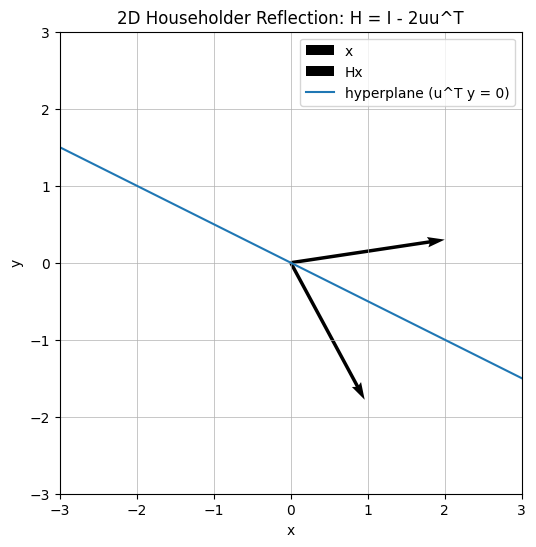

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

# Plot the original and reflected vectors
ax.quiver(0, 0, x[0].item(), x[1].item(), angles='xy', scale_units='xy', scale=1, label='x')
ax.quiver(0, 0, x_reflected[0].item(), x_reflected[1].item(), angles='xy', scale_units='xy', scale=1, label='Hx')

# Plot the reflection hyperplane (all y s.t. u^T y = 0)
u = (v / torch.linalg.norm(v)).numpy()
xs = np.linspace(-3, 3, 200)
if abs(u[1]) < 1e-8:
    ax.plot([0, 0], [-3, 3], linewidth=1.5, label='hyperplane (u^T y = 0)')
else:
    ys = -(u[0] / u[1]) * xs
    ax.plot(xs, ys, linewidth=1.5, label='hyperplane (u^T y = 0)')

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal', adjustable='box')
ax.set_title('2D Householder Reflection: H = I - 2uu^T')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='upper right')
ax.grid(True, linewidth=0.5)

plt.show()

tensor([0.0900, 0.2447, 0.6652])